# **PIMA Indians Diabetes Prediction with ML**

---



## **Context**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## **Content**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## **Acknowledgements**
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

##**Import Essential Libraries & Dataset**

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import requests
from io import StringIO
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
url = "https://drive.google.com/file/d/1INHSR4jA3pa4kQflUi01DAkXafmGThF1/view?usp=drive_link"

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
df = pd.read_csv(csv_raw)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
df.head()

,"<html lang=en><meta charset=utf-8><meta name=viewport content=""initial-scale=1",minimum-scale=1,"width=device-width""><title>Error 404 (Not Found)!!1</title><style nonce=""FbN1s26f3aK-cUoddZrJGw"">*{margin:0;padding:0}html",code{font:15px/22px arial,"sans-serif}html{background:#fff;color:#222;padding:15px}body{color:#222;text-align:unset;margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px;}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}pre{white-space:pre-wrap;}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat 0% 0%/100% 100%;-moz-border-image:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) 0}}@media only screen and (-webkit-min-device-pixel-ratio:2){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat;-webkit-background-size:100% 100%}}#logo{display:inline-block;height:54px;width:150px}</style><main id=""af-error-container"" role=""main""><a href=//www.google.com><span id=logo aria-label=Google role=img></span></a><p><b>404.</b> <ins>That’s an error.</ins><p>The requested URL was not found on this server. <ins>That’s all we know.</ins></main>"


In [8]:
df.sample(10)

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##**Description of Dataset**

---



In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##**Shape of dataset**

---



In [ ]:
df.shape

(768, 9)

##**Checking null values**

---



In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##**Exploratory Data Analysis (EDA)**

---



In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# **Correlation matrix of dataset**

---



<Axes: >

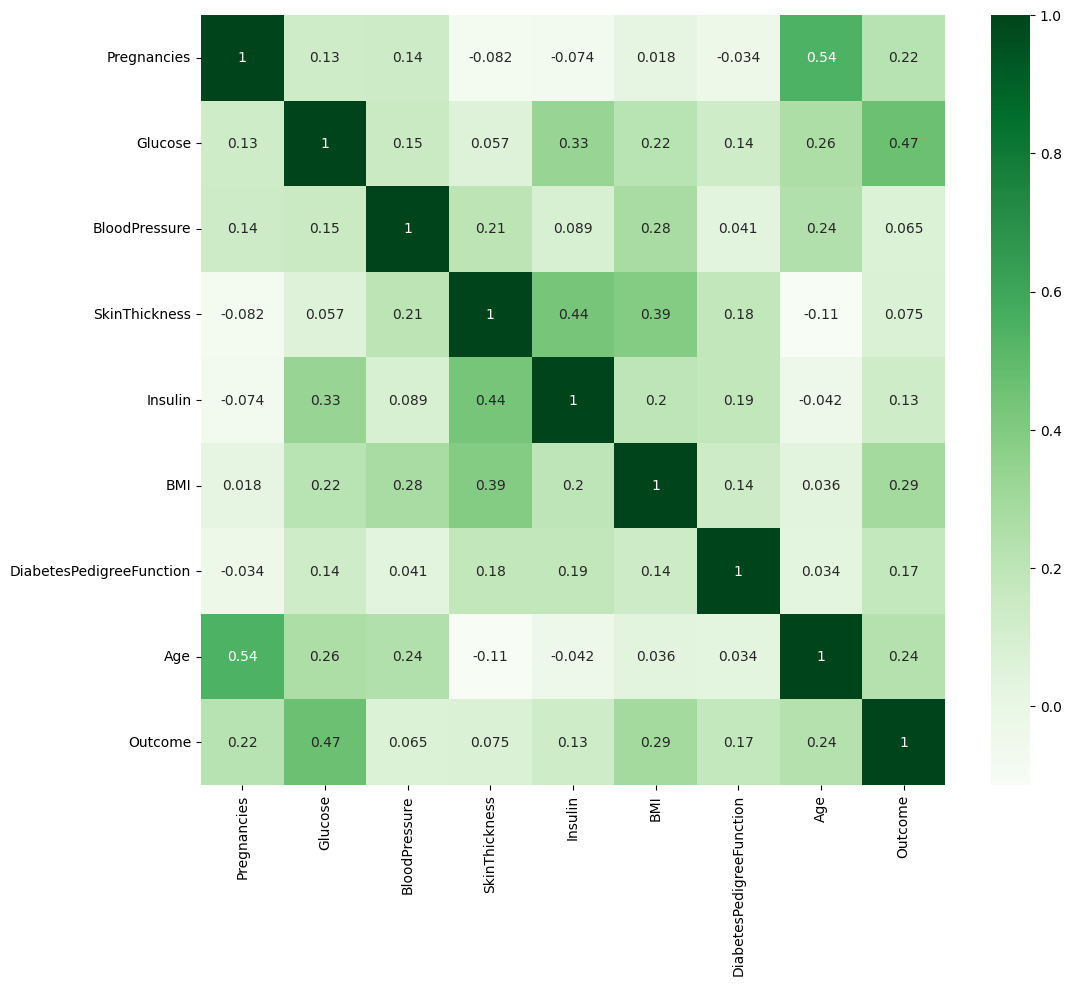

In [ ]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), cmap="Greens", annot =True)

##**Histogram of dataset attributes**

---



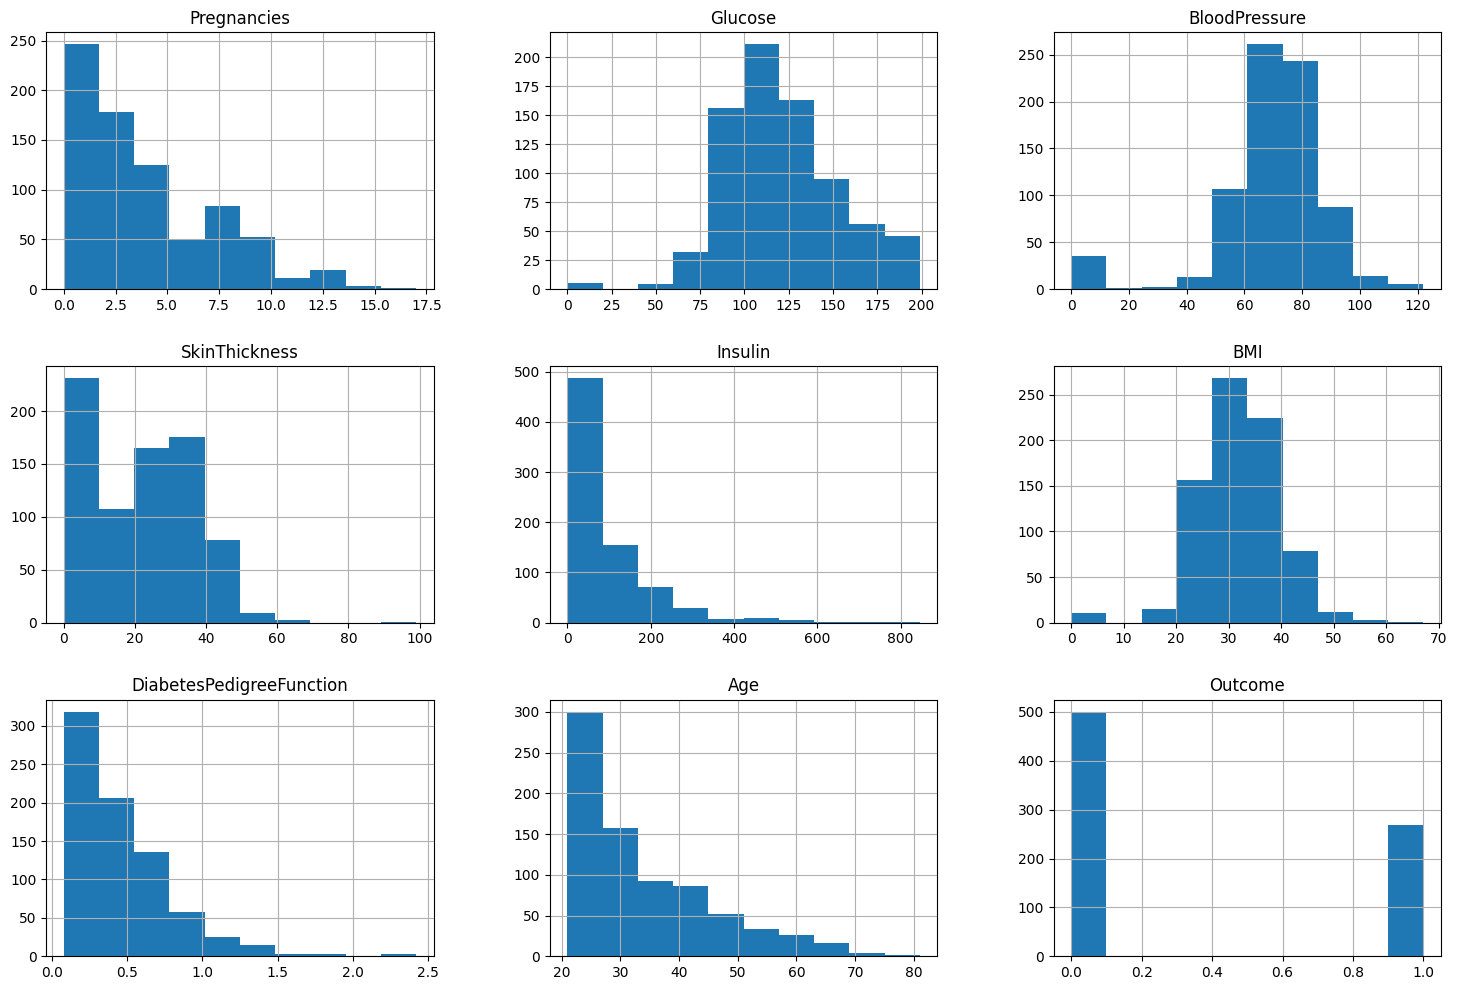

In [ ]:
df.hist(figsize=(18,12))
plt.show()

##**Pairplot of dataset attributes**

---



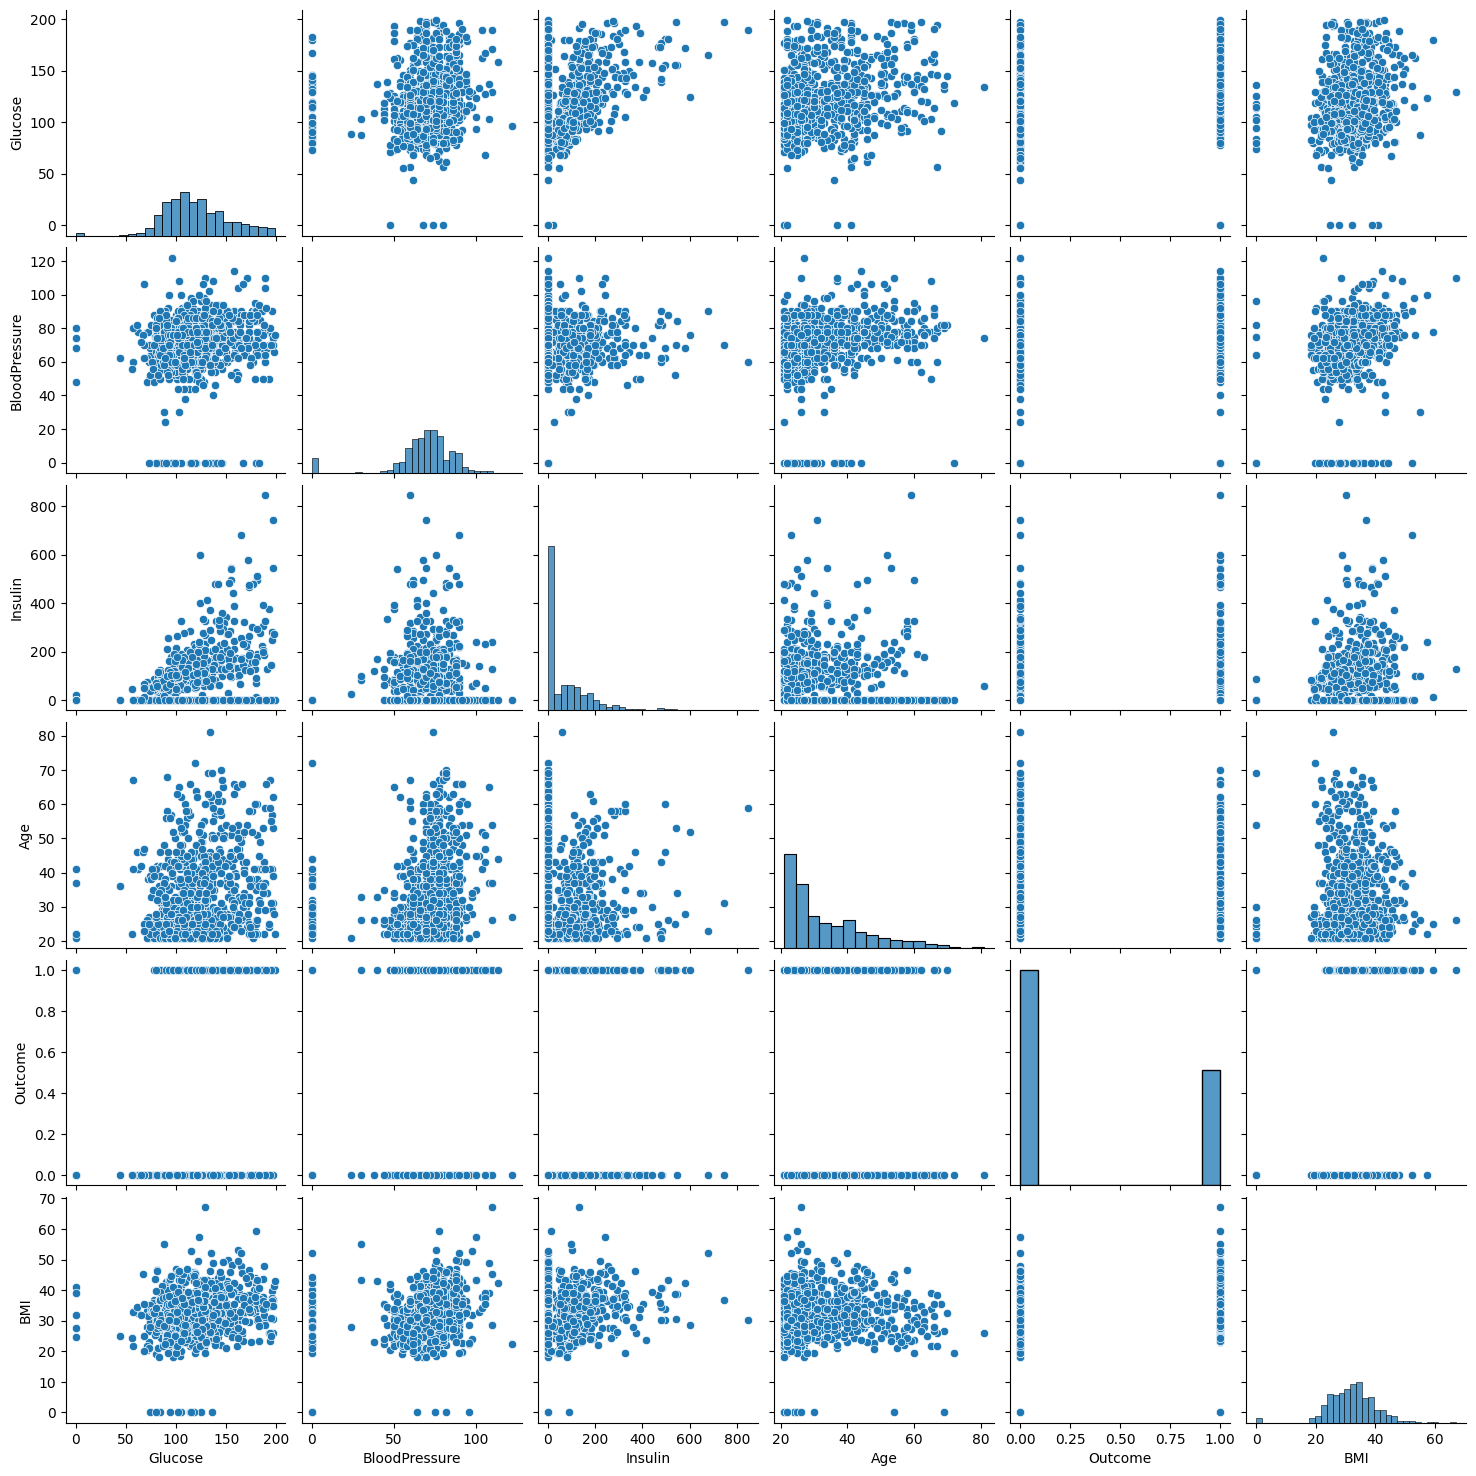

In [ ]:
cols = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(df[cols])

##**Jointplot for attributes of dataset**

---



##Glucose vs. Insulin

---



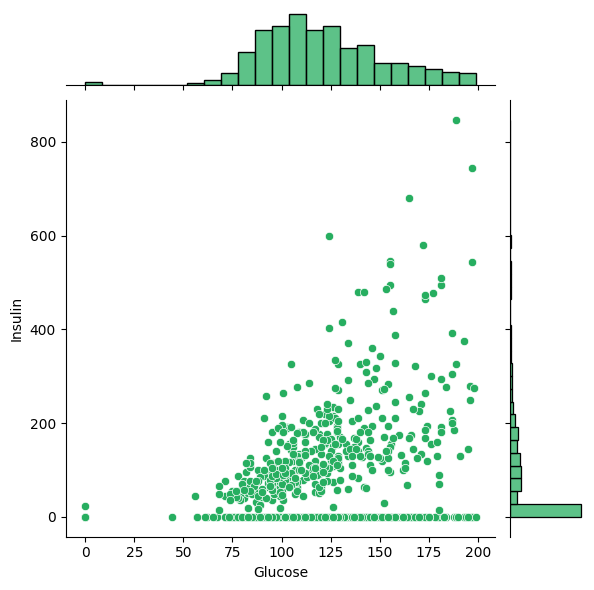

In [ ]:
sns.jointplot(x='Glucose', y= 'Insulin', color="#27AE60", data=df)

##Skin thickness vs. Insulin

---



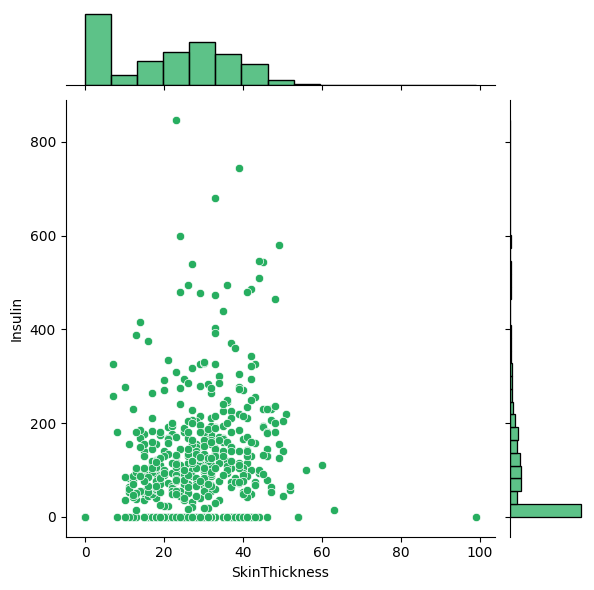

In [ ]:
sns.jointplot(x='SkinThickness', y= 'Insulin', color="#27AE60", data=df)

##BMI vs. Glucose

---



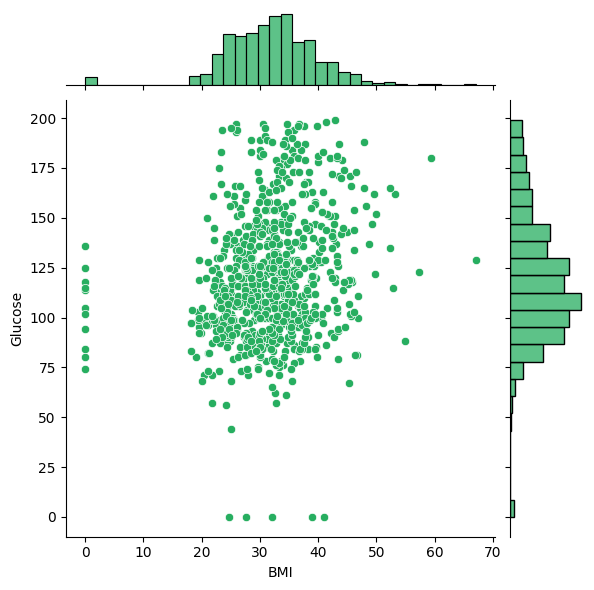

In [ ]:
sns.jointplot(x='BMI', y= 'Glucose', color="#27AE60", data=df)

##Inulin vs. Outcome

---



<Axes: xlabel='Outcome', ylabel='Insulin'>

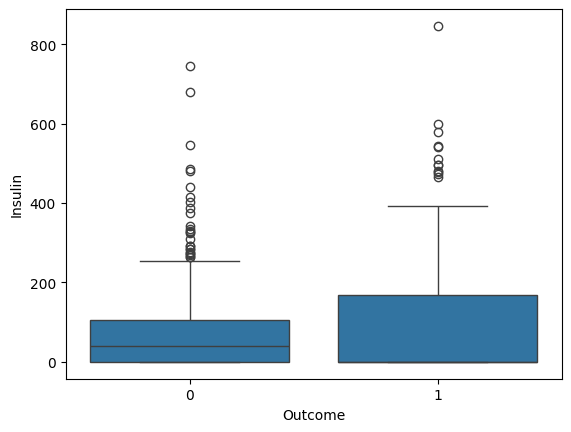

In [ ]:
sns.boxplot(x='Outcome',y='Insulin',data=df)

##**Import essential modules for Machine Learning**

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

##**Training & Testing Data**

---



In [ ]:
x = df.drop(columns = 'Outcome')
y = df['Outcome']

##**Data Normalization using Min-Max Scaler**

---



In [ ]:
x = MinMaxScaler().fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

##**Machine Learning Models**

---



##**Logistic Regression**

---



In [ ]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_lr=reg.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_lr))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_lr))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_lr))
print("R2 score is:\n",r2_score(y_test,y_pred_lr))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154

Confusion Matrix:
 [[99  8]
 [20 27]]
Training Score:
 75.8957654723127
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


Text(0.5, 1.05, 'Confusion Matrix for Logistic Regression')

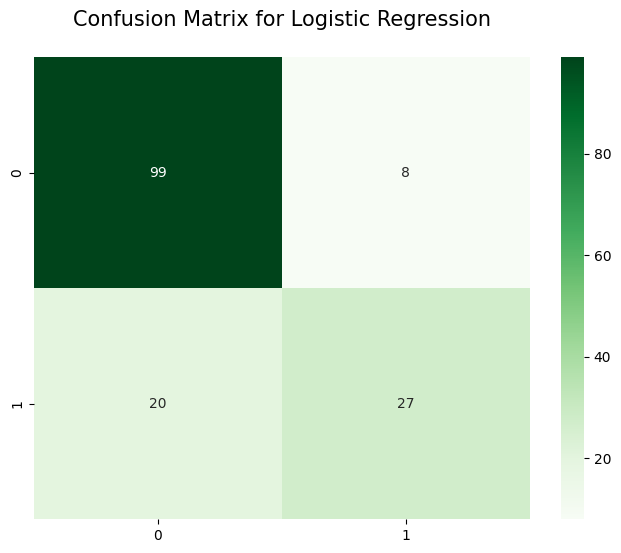

In [ ]:
lr_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(lr_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for Logistic Regression",fontsize=15,y=1.05)

In [ ]:
print("Accuracy score of Logistic Regression : ")
lrAcc = accuracy_score(y_test,y_pred_lr)*100
lrAcc = round(lrAcc, 2)
lrAcc

Accuracy score of Logistic Regression : 


81.82

##**Decision Tree**

---



In [ ]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [ ]:
y_pred_dt=dtree.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_dt))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_dt))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_dt))
print("R2 score is:\n",r2_score(y_test,y_pred_dt))

Classification Report is:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       107
           1       0.59      0.43      0.49        47

    accuracy                           0.73       154
   macro avg       0.68      0.65      0.66       154
weighted avg       0.72      0.73      0.72       154

Confusion Matrix:
 [[93 14]
 [27 20]]
Training Score:
 82.08469055374593
Mean Squared Error:
 0.2662337662337662
R2 score is:
 -0.2555179956253728


Text(0.5, 1.05, 'Confusion Matrix for Decision Tree')

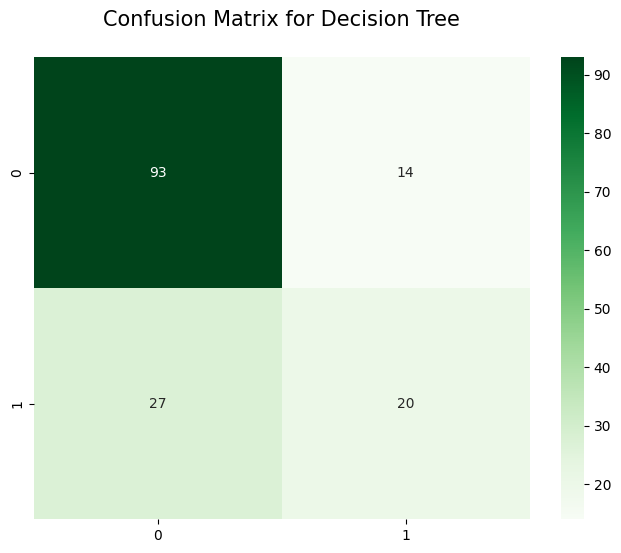

In [ ]:
dtc_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(dtc_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for Decision Tree",fontsize=15,y=1.05)

In [ ]:
print("Accuracy score of Decision Tree : ")
dtcAcc = accuracy_score(y_test,y_pred_dt)*100
dtcAcc = round(dtcAcc, 2)
dtcAcc

Accuracy score of Decision Tree : 


73.38

##**Random Forest**

---



In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf=rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_rf))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rf))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_rf))
print("R2 score is:\n",r2_score(y_test,y_pred_rf))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.71      0.62      0.66        47

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154

Confusion Matrix:
 [[95 12]
 [18 29]]
Training Score:
 100.0
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.08132829588387358


Text(0.5, 1.05, 'Confusion Matrix for Random Forest')

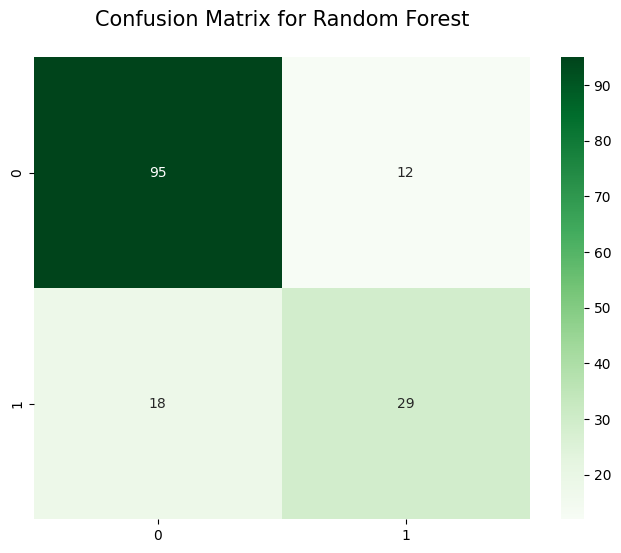

In [ ]:
rf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(rf_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for Random Forest",fontsize=15,y=1.05)

In [ ]:
print("Accuracy score of Random Forest : ")
rfAcc = accuracy_score(y_test,y_pred_rf)*100
rfAcc = round(rfAcc, 2)
rfAcc

Accuracy score of Random Forest : 


80.52

##**K Nearest Neighbour (KNN)**

---



In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn=knn.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_knn))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_knn))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_knn))
print("R2 score is:\n",r2_score(y_test,y_pred_knn))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[94 13]
 [20 27]]
Training Score:
 78.17589576547232
Mean Squared Error:
 0.21428571428571427
R2 score is:
 -0.01053887452773905


Text(0.5, 1.05, 'Confusion Matrix for KNN')

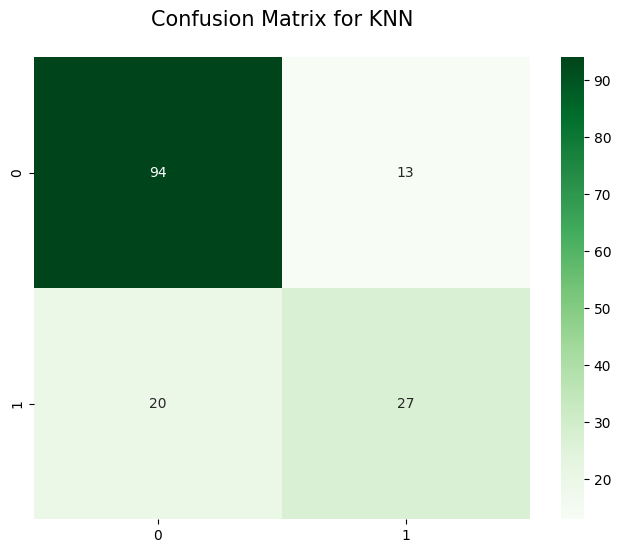

In [ ]:
knn_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,6))
sns.heatmap(knn_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for KNN",fontsize=15,y=1.05)

In [ ]:
print("Accuracy score of KNN : ")
knnAcc = accuracy_score(y_test,y_pred_knn)*100
knnAcc = round(knnAcc, 2)
knnAcc

Accuracy score of KNN : 


78.57

##**Support Vector Classifier (SVC)**

---



In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_svc=svc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_svc))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_svc))
print("R2 score is:\n",r2_score(y_test,y_pred_svc))

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154

Confusion Matrix:
 [[97 10]
 [21 26]]
Training Score:
 79.80456026058633
Mean Squared Error:
 0.2012987012987013
R2 score is:
 0.05070590574666933


Text(0.5, 1.05, 'Confusion Matrix for SVC')

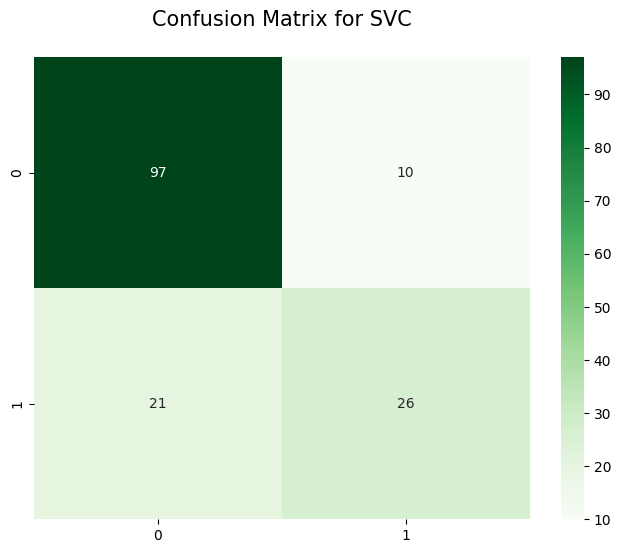

In [ ]:
svc_matrix = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8,6))
sns.heatmap(svc_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for SVC",fontsize=15,y=1.05)

In [ ]:
print("Accuracy score of SVC : ")
svcAcc = accuracy_score(y_test,y_pred_svc)*100
svcAcc =  round(svcAcc, 2)
svcAcc

Accuracy score of SVC : 


79.87

##**XGB Classifier**

---



In [ ]:
xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb=xgb.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred_xgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_xgb))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred_xgb))
print("R2 score is:\n",r2_score(y_test,y_pred_xgb))

Classification Report is:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       107
           1       1.00      0.09      0.16        47

    accuracy                           0.72       154
   macro avg       0.86      0.54      0.49       154
weighted avg       0.80      0.72      0.63       154

Confusion Matrix:
 [[107   0]
 [ 43   4]]
Training Score:
 67.26384364820846
Mean Squared Error:
 0.2792207792207792
R2 score is:
 -0.3167627758997813


Text(0.5, 1.05, 'Confusion Matrix for XGB')

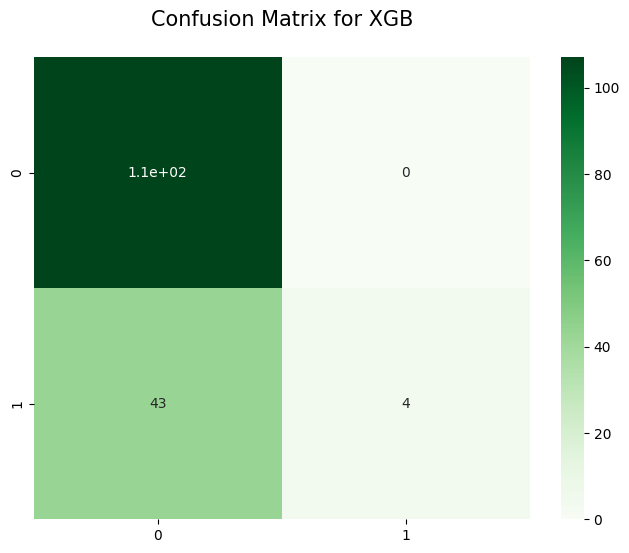

In [ ]:
xgb_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(xgb_matrix, cmap='Greens', annot=True)
plt.title("Confusion Matrix for XGB",fontsize=15,y=1.05)

In [ ]:
print("Accuracy score of XGB : ")
xgbAcc = accuracy_score(y_test,y_pred_xgb)*100
xgbAcc = round(xgbAcc, 2)
xgbAcc

Accuracy score of XGB : 


72.08

##**Voting Classifier 1**

---



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Initialize classifiers
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()

# Creating ensemble of classifiers
voting_clf1 = VotingClassifier(estimators=[('lr', log_reg), ('dt', decision_tree)], voting='soft')

# Training the ensemble classifier
voting_clf1.fit(X_train_scaled, y_train)

# Making predictions
y_pred1 = voting_clf1.predict(X_test_scaled)

Text(0.5, 1.05, 'Confusion Matrix for Voting Classifier 1')

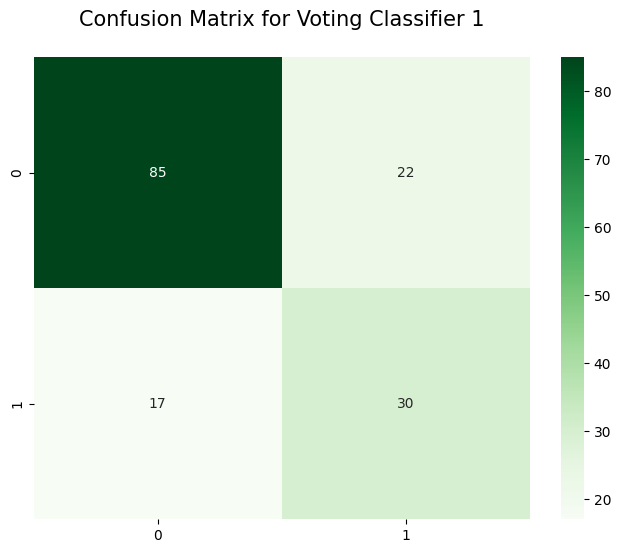

In [ ]:
voting_matrix1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8,6))
sns.heatmap(voting_matrix1, cmap='Greens', annot=True)
plt.title("Confusion Matrix for Voting Classifier 1",fontsize=15,y=1.05)

*

In [ ]:
# Calculating accuracy
votingAcc1 = accuracy_score(y_test, y_pred1)*100
print("Accuracy score of Voting Classifier 1:", votingAcc1)

Accuracy score of Voting Classifier 1: 74.67532467532467


##**Voting Classifier 2**

---



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Initialize classifiers
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Creating ensemble of classifiers
voting_clf2 = VotingClassifier(estimators=[('knn', knn), ('rf', rf)], voting='soft')

# Training the ensemble classifier
voting_clf2.fit(X_train_scaled, y_train)

# Making predictions
y_pred2 = voting_clf2.predict(X_test_scaled)

Text(0.5, 1.05, 'Confusion Matrix for Voting Classifier 2')

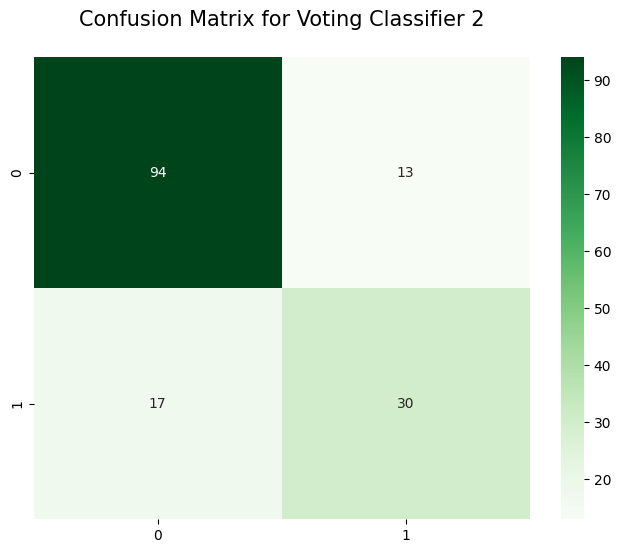

In [ ]:
voting_matrix2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8,6))
sns.heatmap(voting_matrix2, cmap='Greens', annot=True)
plt.title("Confusion Matrix for Voting Classifier 2",fontsize=15,y=1.05)

In [ ]:
# Calculating accuracy
votingAcc2 = accuracy_score(y_test, y_pred2)*100
print("Accuracy score of Voting Classifier 2:", votingAcc2)

Accuracy score of Voting Classifier 2: 80.51948051948052


##**Voting Classifier 3**

---



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Initialize classifiers
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# Creating ensemble of classifiers
voting_clf3 = VotingClassifier(estimators=[('knn', knn), ('dt', dt)], voting='soft')

# Training the ensemble classifier
voting_clf3.fit(X_train_scaled, y_train)

# Making predictions
y_pred3 = voting_clf3.predict(X_test_scaled)

Text(0.5, 1.05, 'Confusion Matrix for Voting Classifier 3')

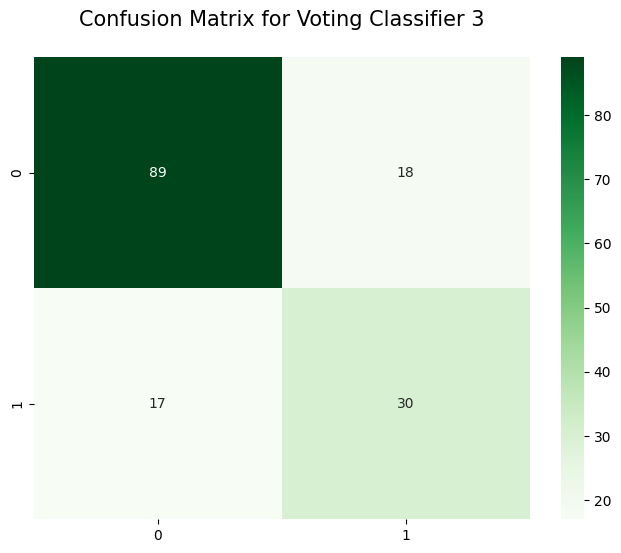

In [ ]:
voting_matrix3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8,6))
sns.heatmap(voting_matrix3, cmap='Greens', annot=True)
plt.title("Confusion Matrix for Voting Classifier 3",fontsize=15,y=1.05)

In [ ]:
# Calculating accuracy
votingAcc3 = accuracy_score(y_test, y_pred3)*100
print("Accuracy score of Voting Classifier 3:", votingAcc3)

Accuracy score of Voting Classifier 3: 77.27272727272727


## Accuracy score comparison

---



In [ ]:
compare = pd.DataFrame({'Model': ['K-Nearest Neighbour', 'Support Vector Classifier',
                        'Decision Tree', 'Random Forest', 'Logistic Regression', 'XGB Classifier', 'Voting Classifier 1', 'Voting Classifier 2', 'Voting Classifier 3'],
                        'Accuracy': [knnAcc, svcAcc, dtcAcc, rfAcc, lrAcc, xgbAcc, votingAcc1, votingAcc2, votingAcc3]})

compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='Greens')

,Model,Accuracy
4,Logistic Regression,81.820000
3,Random Forest,80.520000
7,Voting Classifier 2,80.519481
1,Support Vector Classifier,79.870000
0,K-Nearest Neighbour,78.570000
8,Voting Classifier 3,77.272727
6,Voting Classifier 1,74.675325
2,Decision Tree,73.380000
5,XGB Classifier,72.080000


# **Conclusions**

---



## <div style="font-family: Trebuchet MS; background-color: #1F618D; color: #FFFFFF; padding: 12px; line-height: 1.5; text-align: center;">After using of <b style="color: #F4D03F">K-Nearest Neighbour</b>, <b style="color: #F4D03F">Support Vector Classifier</b>, <b style="color: #F4D03F">Decision Tree</b>, <b style="color: #F4D03F">Random Forest</b> , <b style="color: #F4D03F">Logistic Regression</b> , <b style="color: #F4D03F">XGB Classifier</b>, <b style="color: #F4D03F">Voting Classifiers</b>, we got accuracy score of individual ML Algorithms. Then we have done comparison among accuracy scores of above mentioned algorithms. Now, we know that, <b style="color: #F4D03F">which algorithm has the highest accuracy score</b> among all.</div>